In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [3]:
class QuadState(TypedDict):
    a: int 
    b: int
    c: int

    equation : str 
    discriminant : float 
    result : str

In [12]:
def show_equation(state : QuadState):
    """This function is used to create a equation """

    equation = f'{state['a']}x2*{state['b']}x{state['c']}'

    return {'equation':equation}

def calculate_discriminant(state : QuadState):
    """ This function calculate the discriminant """

    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return { 'discriminant' :discriminant}

In [20]:
def real_root(state : QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5)/2*state['a']
    root2 = (-state['b'] - state['discriminant']**0.5)/2*state['a']

    result = f'the roots are {root1} and {root2}'

    return {'result':result }

def repeated_root(state : QuadState):
    root = (-state['b']/2*state['a'])

    result = f'only repeating root is {root}'

    return {'result':result }

def no_real_root(state : QuadState):

    result = f'No real root'

    return {'result':result }


# function to create a condition
def check_conditions(state : QuadState) -> Literal['real_root', 'repeated_root', 'no_real_root']:

    if state['discriminant'] > 0:
        return 'real_root'
    elif state['discriminant'] == 0:
        return 'repeated_root'
    else :
        return 'no_real_root'

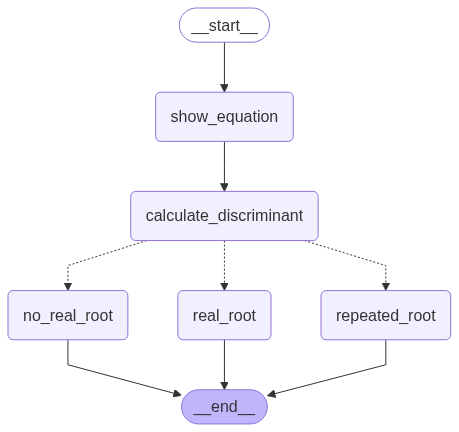

In [24]:
graph = StateGraph(QuadState)

# add nodes 
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_root', real_root)
graph.add_node('repeated_root', repeated_root)
graph.add_node('no_real_root', no_real_root)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_conditions)
graph.add_edge('real_root', END)
graph.add_edge('no_real_root', END)
graph.add_edge('repeated_root', END)


graph.compile()


In [26]:
workflow = graph.compile()

initial_state = {
    'a':4,
    'b':2,
    'c':2
}
response = workflow.invoke(initial_state)
print(response)

{'a': 4, 'b': 2, 'c': 2, 'equation': '4x2*2x2', 'discriminant': -28, 'result': 'No real root'}
